# DATA SCIENCE JOB MARKET ANALYSIS

## 2. Pre-processing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Now it is time to read the file we have generated.

In [3]:
# To read the csv file you generated, just simply change the name of file below.
DS_jobs_df=pd.read_csv("DataScience_job_sample.csv", index_col=0)
print(len(DS_jobs_df))
DS_jobs_df.tail(5)

1009


,roles,companies,locations,experience,skills
1004,Data Scientist,vhr Professional Services,"Singapore, Canada, United Kingdom (UK)",2-7 Yrs,"Data Scientist, Statistical Analysis, R, phyth..."
1005,Data Scientist,Reycruit,Hyderabad,5-10 Yrs,"Data Science, Scikit-Learn, Python, Data, Science"
1006,Data Scientist,Talent Corner Hr Services,Navi Mumbai,2-4 Yrs,"Java, Spark, Apache, Python, GIT, Pandas, Open..."
1007,Data Scientist,Talent Corner Hr Services,Mumbai (All Areas),2-4 Yrs,"Java, GIT, Apache Flink, Pandas, Open Api, Azu..."
1008,Hiring For a Data Scientist + GenAI Reosurce |...,Aphthartos Technologies,Mumbai (All Areas),4-8 Yrs,"NLP, Data Science, Generative AI, Cloud, Machi..."


In [4]:
#lets check if our data have any null values
DS_jobs_df.isna().sum()

roles          6
companies     11
locations     13
experience    18
skills        15
dtype: int64

In [5]:
#lets drop the missing values
DS_jobs_df=DS_jobs_df.dropna()

In [6]:
#lets check if our data have any dupplicate data
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","roles","locations","skills"])].shape

(30, 5)

In [7]:
print("Before dropping duplicates : ",DS_jobs_df.shape)
DS_jobs_df.drop_duplicates(keep="first",inplace=True)
print("After dropping duplicates : ", DS_jobs_df.shape)

Before dropping duplicates :  (990, 5)
After dropping duplicates :  (969, 5)


In [8]:
#lets lower case all the strings to avoid redundancy
DS_jobs_df=DS_jobs_df.apply(lambda x: x.astype(str).str.lower())

#there are more than one location and skill are attcahed to each job, so lets split locations and jobs.
DS_jobs_df.locations=[location.split(",") for location in DS_jobs_df.locations]
DS_jobs_df[15:20]

,roles,companies,locations,experience,skills
21,data scientist- supply chain operations,allegis group,[bengaluru],10-19 yrs,"data science, supply chain analytics, machine ..."
22,data scientist,jll technologies,[gurugram],3-8 yrs,"cloud computing, data analysis, data managemen..."
23,data scientist - gen ai,genpact,"[hybrid - noida, gurugram, bengaluru]",8-12 yrs,"artificial intelligence, aws bedrocks, azure m..."
24,data scientist,infosys,[bengaluru],9-11 yrs,"business acumen, data science, model developme..."
50,data scientist,wildnet technologies,[bengaluru],3-8 yrs,"data science, artificial intelligence, machine..."


## 3. Exploratory Data analysis

### 3.1. Location wise Data science jobs


In [9]:
# link of differnt collor pallets: https://matplotlib.org/stable/users/explain/colors/colormaps.html
colors = plt.cm.Set3.colors[:15]  # You can try 'Accent', 'tab10', or 'Dark2' for variety.


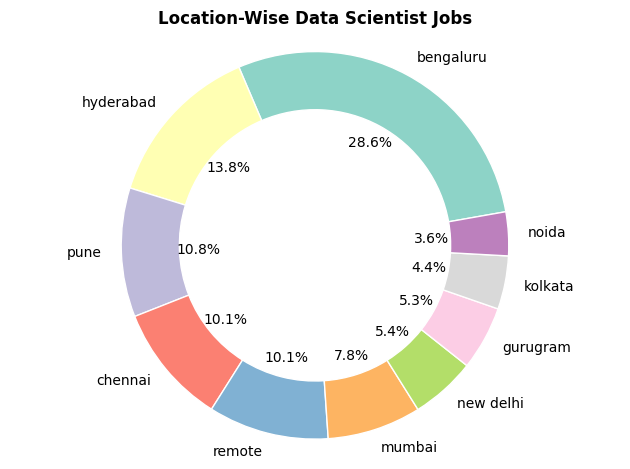

In [10]:
# Top 10 Locations with Most Data Scientist Jobs
location_counts = DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10]

# Plotting a donut-style pie chart
plt.pie(
    location_counts,
    colors = colors,
    labels=location_counts.index,
    startangle=10,
    autopct='%1.1f%%',
    wedgeprops=dict(width=0.3, edgecolor='w')
)

plt.title("Location-Wise Data Scientist Jobs", weight='bold')

# Add a white circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.60, fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  # Ensure the pie is drawn as a circle
plt.tight_layout()
plt.show()


##### Observations:
1. Bangalore tops the list with almost 30% of the total jobs.
2. Top three cities Bangalore, Hyderabad and Pune constitues more than 50% of the total jobs.

### 3.2 Companies with more Data science openings

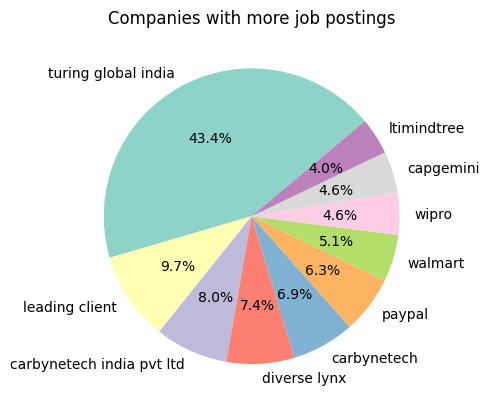

In [11]:
company_count = DS_jobs_df["companies"].value_counts()[:10]
plt.pie(company_count, 
        labels=company_count.index,  #labels
        startangle=40, 
        colors=colors, 
        autopct='%1.1f%%')
plt.title("Companies with more job postings")
plt.show()

#### Observations:
1. Turing Global India tops the list with 43% of the total job listings.
2. there are quite a few consultancies activey recruiting for their clients.

### 3.3 Data Scientist roles in demand

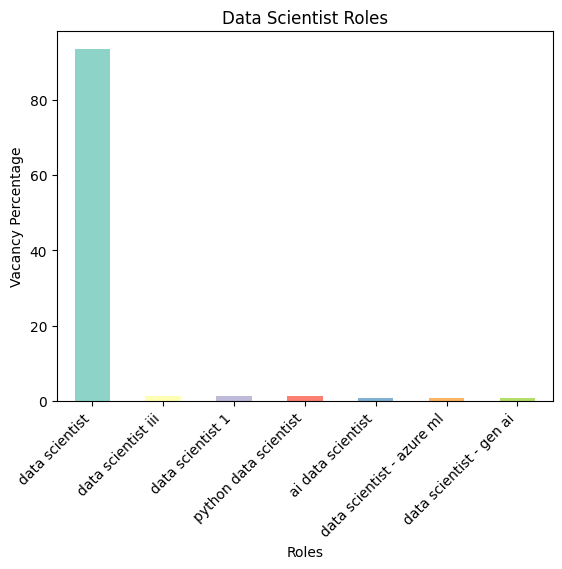

In [12]:
# Calculate the percentage of each role
role_counts = DS_jobs_df["roles"].value_counts()[:7]
role_percentages = role_counts / role_counts.sum() * 100

# Plot the bar chart with percentages
role_percentages.plot.bar(color=colors)

# Customize the chart
plt.xticks(rotation=45, ha='right')
plt.title("Data Scientist Roles")
plt.ylabel("Vacancy Percentage", rotation=90)
plt.xlabel("Roles")
plt.show()


#### Observations:
1. Data science roles are mostly termed with data scientist role.

### 3.4. Desired Experience for Data science jobs

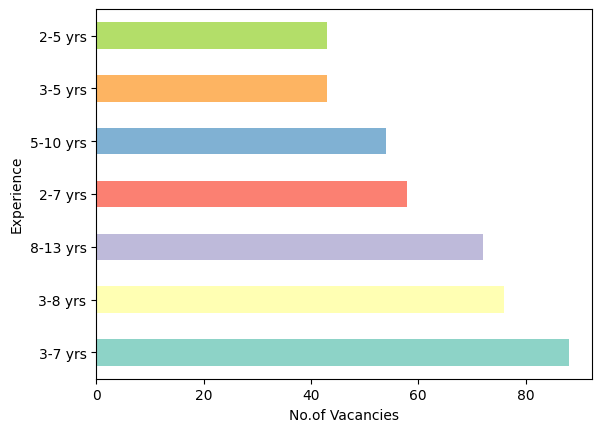

In [13]:
experience_count = DS_jobs_df["experience"].value_counts()[:7]
experience_count.plot.barh(color=colors)
plt.xlabel("No.of Vacancies")
plt.ylabel("Experience")
plt.show()

#### Observations:
1. There seems to more vacancies for people with a medior/senior level.
2. Candidates with atleast 3 years of experience have a fair opportunities.

### 3.5. Skills required for a Data science job

In [14]:
# Tokenizing  skills columns
#  Step 1: Split comma-separated strings into individual skills USING .str.split(',')
# Step 2: Explode to get one skill per row USING .explode()
# Step 3: Drop the spaces USING .str.strip()
skills_data = DS_jobs_df['skills'].str.split(',').explode().str.strip()

# Top 7 most required skills in jab market.
top_skills = skills_data.value_counts().head(20)
print(top_skills)


skills
machine learning               593
data science                   313
python                         284
data analysis                  210
sql                            199
analytical                     182
data                           130
natural language processing    129
computer science               129
artificial intelligence        119
data mining                    114
deep learning                  104
analytics                       99
machine                         77
data visualization              75
data scientist                  69
gcp                             68
predictive modeling             61
neural networks                 58
programming                     56
Name: count, dtype: int64


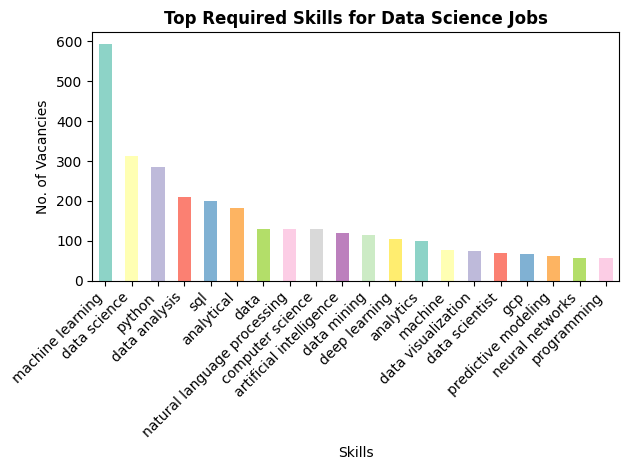

In [15]:
# Plot
top_skills.plot(kind="bar", color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel("No. of Vacancies")
plt.xlabel("Skills")
plt.title("Top Required Skills for Data Science Jobs", weight='bold')
plt.tight_layout()
plt.show()


#### Observations:
1. looks clumsy right lets break it down, the reason i included top 30 skills beacuse of the vast fields covered by Data science.
2. we will go one by one sub fields and compare their peers in that to get the better understanding.

In [16]:
#lets convert the skills column into a seperate DataFrame, which makes things easy for further analysis.
skl_df=pd.DataFrame(DS_jobs_df.skills.apply(pd.Series).stack().value_counts()).reset_index()
skl_df.columns=["skills","count"]
skl_df.head()

,skills,count
0,data scientist,15
1,"algorithms, python, modeling, data analysis, d...",8
2,"computer vision, orchestration, gcp, analytica...",4
3,"azure, azure ml, mlflow, mlops, machine learni...",4
4,"cloud computing, version control, machine lear...",3


### 3.5.1. Must Have Skills

In [17]:
#lets first find the top skills for Data science in general
# Extra material for regular expression: https://regexlearn.com/
datascience={}
datascience['statistics']=skl_df["count"][skl_df['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning']=skl_df["count"][skl_df['skills'].str.contains('machine |^ml', regex=True)].sum()
datascience['data_analysis']=skl_df["count"][skl_df['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining']=skl_df["count"][skl_df['skills'].str.contains('mining', regex=True)].sum()
datascience['nlp']=skl_df["count"][skl_df['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['computer_vision']=skl_df["count"][skl_df['skills'].str.contains('computer vision', regex=True)].sum()
datascience['deep_learning']=skl_df["count"][skl_df['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data']=skl_df["count"][skl_df['skills'].str.contains('big', regex=True)].sum()

In [18]:
from operator import itemgetter

# Sort the 'datascience' dictionary by its values in descending order
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience

{'machine_learning': np.int64(605),
 'data_analysis': np.int64(245),
 'nlp': np.int64(153),
 'data_mining': np.int64(128),
 'statistics': np.int64(108),
 'deep_learning': np.int64(106),
 'computer_vision': np.int64(56),
 'big_data': np.int64(33)}

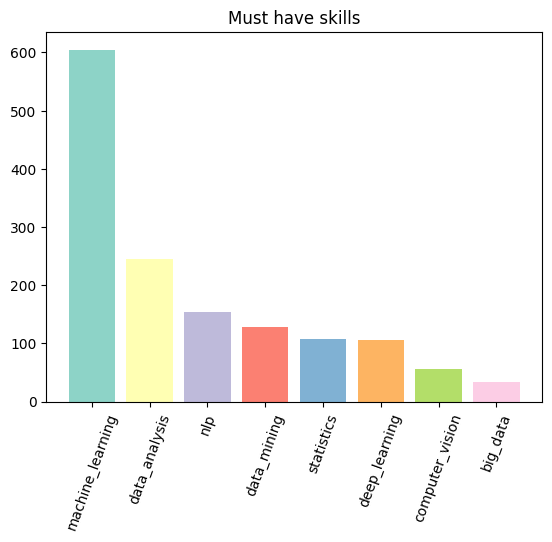

In [19]:
# Plot the most important skills.
plt.bar(datascience.keys(),datascience.values(),color=colors)
plt.xticks(rotation=70)
plt.title("Must have skills")
plt.show()

### 3.5.2. Languauges in demand

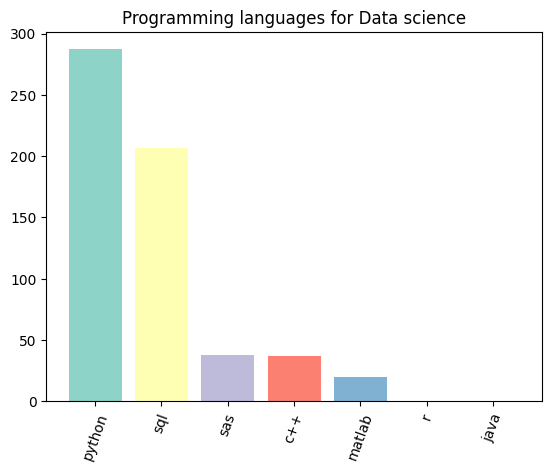

In [20]:
# Language selection
languages={}
languages["python"]=skl_df["count"][skl_df['skills'].str.contains('python', regex=True)].sum()
languages["r"]=skl_df["count"][skl_df['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=skl_df["count"][skl_df['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=skl_df["count"][skl_df['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=skl_df["count"][skl_df['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=skl_df["count"][skl_df['skills'].str.contains('sas', regex=True)].sum()

#to identify the Sql first and then seperate the nosql from the list
sql=skl_df[skl_df['skills'].str.contains('sql', regex=True)]
languages["sql"]=sql["count"][~sql['skills'].str.contains('no', regex=True)].sum()

#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(languages.keys(),languages.values(),color=colors)
plt.xticks(rotation=70)
plt.title("Programming languages for Data science")
plt.show()

### 3.5.3. Deep learning frameworks

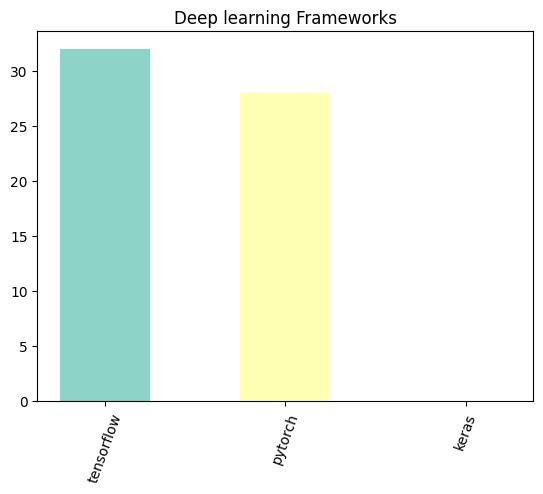

In [21]:
# Framework selection
frameworks={}
frameworks['tensorflow']=skl_df["count"][skl_df['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=skl_df["count"][skl_df['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=skl_df["count"][skl_df['skills'].str.contains('torch', regex=True)].sum()

# Sort
frameworks=dict(sorted(frameworks.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(frameworks.keys(),frameworks.values(),color=colors,width=.5)
plt.xticks(rotation=70)
plt.title("Deep learning Frameworks")
plt.show()

### 3.5.5. Clouds for Data Science

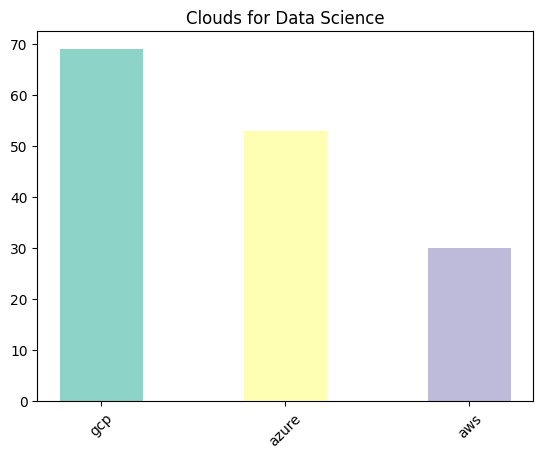

In [22]:
#Providers selection
cloud={}
cloud['aws']=skl_df["count"][skl_df['skills'].str.contains('aws', regex=True)].sum()
cloud['azure']=skl_df["count"][skl_df['skills'].str.contains('azure', regex=True)].sum()
cloud['gcp']=skl_df["count"][skl_df['skills'].str.contains('gcp')].sum()

# Sort
cloud=dict(sorted(cloud.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(cloud.keys(),cloud.values(),color=colors,width=.45)
plt.xticks(rotation=45)
plt.title("Clouds for Data Science")
plt.show()

### 3.5.6. Big data technologies for Data science

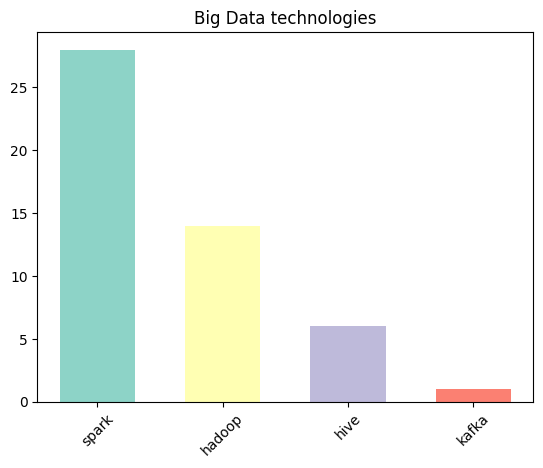

In [23]:
# Tech Selection
bigdata={}
bigdata["spark"]=skl_df["count"][skl_df['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=skl_df["count"][skl_df['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=skl_df["count"][skl_df['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=skl_df["count"][skl_df['skills'].str.contains('kafka', regex=True)].sum()

# Sort
bigdata=dict(sorted(bigdata.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(bigdata.keys(),bigdata.values(),color=colors,width=0.6)
plt.xticks(rotation=45)
plt.title("Big Data technologies")
plt.show()

### 3.5.7. Data Visualization tools

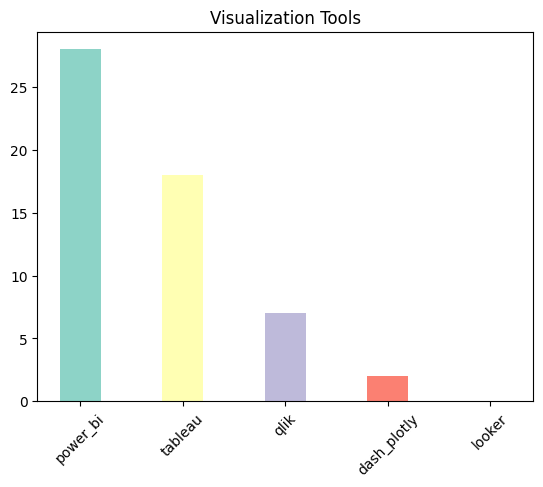

In [24]:
# tools selection
tools={}
tools["tableau"]=skl_df["count"][skl_df['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=skl_df["count"][skl_df['skills'].str.contains('power bi', regex=True)].sum()
tools["looker"] = skl_df["count"][skl_df['skills'].str.contains('looker', regex=True)].sum()
tools["qlik"] = skl_df["count"][skl_df['skills'].str.contains('qlik', regex=True)].sum()
tools["dash_plotly"] = skl_df["count"][skl_df['skills'].str.contains('plotly|dash', regex=True)].sum()

# Sort
tools=dict(sorted(tools.items(), key=itemgetter(1),reverse=True))

# Plot
plt.bar(tools.keys(),tools.values(),color=colors,width=(0.4))
plt.xticks(rotation=45)
plt.title("Visualization Tools")
plt.show()